# **South African COVID-19 Vulnerability**
In the M2 Hackathon we will use data from Zindi.

Zindi hosts the largest community of African data scientists, working to solve the world’s most pressing challenges using machine learning and AI. Zindi connect data scientists with organisations, and provide a place to learn, hone skills and find a job. Zindi wants to transform the African continent and showcase African data science talent to the world.

The ultimate task is to predict the percentage of households in South Africa  that fall into a particularly vulnerable bracket - large households who must leave their homes to fetch water - using 2011 South African census data. These households will be identified as vulnerable during the COVID-19 pandemic and targeted for special government assistance.  Solving this challenge will show that with machine learning it is possible to use easy-to-measure stats to identify areas most at risk even in years when census data is not collected.

#####Resource : https://zindi.africa/competitions/zindiweekendz-learning-south-african-covid-19-vulnerability-map



#**Business Problem**
Using the data, code from the M2 EDA Python notebooks, and any other resources (properly referenced), as appropriate:
* Develop and interpret descriptive statistics (both numeric and graphical) to
* Identify data pre-processing action items to facilitate development of an ML model
and
* Identify predictors that may be useful for development of an ML model. The target variable is **target_pct_vunerable**.

# **Data**

Sign up for the competition at Zindi here: https://zindi.africa/competitions/zindiweekendz-learning-south-african-covid-19-vulnerability-map

Then confirm your email address.

Access to the data is controlled by Zindi, and there is no way to legally provide the data otherwise.


##### Download the "Train.csv" dataset from the source. https://zindi.africa/competitions/zindiweekendz-learning-south-african-covid-19-vulnerability-map/data

The data is
It will be comptressed in the download (extract Train.csv and save it your Google drive)

The full data dictionary appears below. We will use only 11 of the features, as shown below, due to limited time, and to ensure reasonable comptutational efficiency. Code to read in the data and extract the 11 features is provided below.

#####**target_pct_vunerable**,Percentage of large households who have to leave their premises for water
#####**dw_00**,Percentage of dwellings of type: House or brick/concrete block structure on a separate stand or yard or on a farm
#####**dw_01**,Percentage of dwellings of type: Traditional dwelling/hut/structure made of traditional materials
#####**dw_02**,Percentage of dwellings of type: Flat or apartment in a block of flats
#####**dw_03**,Percentage of dwellings of type: Cluster house in complex
#####**dw_04**,Percentage of dwellings of type: Townhouse (semi-detached house in a complex)
#####**dw_05**,Percentage of dwellings of type: Semi-detached house
#####**psa_00**,Percentage listing present school attendance as:  Yese
#####**stv_00**,Percentage of households with Satellite TV:  Yes
#####**car_00**,Percentage of households with a car:  Yes
#####**lgt_00**,Percentage using electricity for lighting

# Libraries

In [ ]:
# Basic Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# !pip install --upgrade plotly   # you may need to pip install plotly
# !pip install jupyter-dash       # you may need to install jupyter-dash

import plotly.graph_objects as go
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

In [ ]:
# !pip install sweetviz     # You may need to pip install sweetviz
import sweetviz as sv

# Read Data & Basic Checks

In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

# Read
file_ = "/content/drive/My Drive/JHU Information System/BDML/Train.csv"   # adapt this as needed to the file structure on your Google drive
df = pd.read_csv(file_) # read in csv file

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Consider using a random sample of the first 500 rows while you develop your code (to save exceution time)
# Then run your final code  on the full datset
# df = df.sample(n=500, random_state=12354)

In [ ]:
# Use only 11 features and save it to df again
df = df[["target_pct_vunerable", "dw_00", "dw_01", "dw_02", "dw_03", "dw_04", "dw_05", "psa_00", "stv_00","car_00","lgt_00"]]

In [ ]:
# Examine the data using df.head() or df.tail()
print("HEAD of df\n", df.head())

# Shape of DataFrame
print("\nSHAPE of df\n", df.shape)

NameError: ignored

In [ ]:
# Checks

# Check data types
print(df.info())

# Check for missing values
print('\n\nMissing Values\n',df.isnull().sum(axis=0))

# Check for duplicates
print('\n Duplicates\n',df.duplicated().sum())

# Conclusion:
# All datatypes are float
# No missing values or duplicates to address

# Numerical Descriptive Statistics

In [ ]:
# Univariate descriptive statistics using pandas

# Ensure the maximum number of columns are displayed in pandas
pd.set_option('display.max_columns', None)

# Univariate numerical statistics using pandas .describe
print("UNIVARIATE DESCRIPTIVE STAT using pandas\n",df.describe(include='all').T)
print("\n SKEWNESS\n",df.skew())
print("\n FISHER'S KURTOSIS\n",df.kurt())

# many variables has heavy skewness， a correction should be produced.
# dw02 to dw05 has very high kurtosis, meaning the tails are heavy and there will be many extreme values.
# the target_pct_vunerable and other variables are not using the same unit. (100% for target_pct_vunerable, 1 for others)

UNIVARIATE DESCRIPTIVE STAT using pandas
                        count       mean        std       min       25%  \
target_pct_vunerable  3174.0  10.258947  12.847192  0.000000  0.429761   
dw_00                 3174.0   0.710593   0.217458  0.000000  0.591480   
dw_01                 3174.0   0.097372   0.188484  0.000000  0.002919   
dw_02                 3174.0   0.031894   0.078634  0.000000  0.002421   
dw_03                 3174.0   0.005820   0.018592  0.000000  0.000000   
dw_04                 3174.0   0.008202   0.029408  0.000000  0.000000   
dw_05                 3174.0   0.006047   0.023772  0.000000  0.000000   
psa_00                3174.0   0.312657   0.077324  0.000000  0.257287   
stv_00                3174.0   0.227041   0.174264  0.000000  0.097476   
car_00                3174.0   0.247346   0.191623  0.000000  0.130916   
lgt_00                3174.0   0.830599   0.208129  0.001692  0.788085   

                           50%        75%         max  
target_pct_vu

CORRELATION MATRIX
                       target_pct_vunerable     dw_00     dw_01     dw_02  \
target_pct_vunerable              1.000000 -0.265211  0.653851 -0.076879   
dw_00                            -0.265211  1.000000 -0.632024 -0.347238   
dw_01                             0.653851 -0.632024  1.000000  0.008928   
dw_02                            -0.076879 -0.347238  0.008928  1.000000   
dw_03                            -0.147196 -0.148434 -0.071041  0.201970   
dw_04                            -0.187169 -0.116038 -0.111734  0.208176   
dw_05                            -0.146853 -0.072071 -0.097936  0.016129   
psa_00                            0.634991  0.033148  0.461246 -0.090354   
stv_00                           -0.476828  0.235681 -0.400584  0.218411   
car_00                           -0.435609  0.112045 -0.308602  0.278270   
lgt_00                           -0.513307  0.544002 -0.609962  0.035716   

                         dw_03     dw_04     dw_05    psa_00    stv

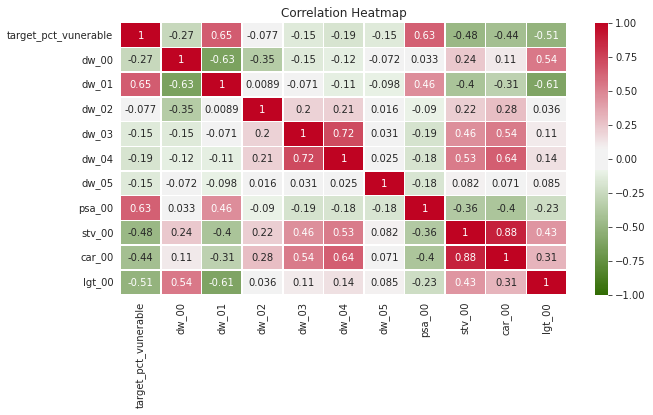



COVARIANCE MATRIX
                       target_pct_vunerable     dw_00     dw_01     dw_02  \
target_pct_vunerable            165.050341 -0.740927  1.583297 -0.077665   
dw_00                            -0.740927  0.047288 -0.025905 -0.005938   
dw_01                             1.583297 -0.025905  0.035526  0.000132   
dw_02                            -0.077665 -0.005938  0.000132  0.006183   
dw_03                            -0.035158 -0.000600 -0.000249  0.000295   
dw_04                            -0.070715 -0.000742 -0.000619  0.000481   
dw_05                            -0.044850 -0.000373 -0.000439  0.000030   
psa_00                            0.630798  0.000557  0.006722 -0.000549   
stv_00                           -1.067523  0.008931 -0.013158  0.002993   
car_00                           -1.072392  0.004669 -0.011146  0.004193   
lgt_00                           -1.372518  0.024621 -0.023928  0.000585   

                         dw_03     dw_04     dw_05    psa_00    st

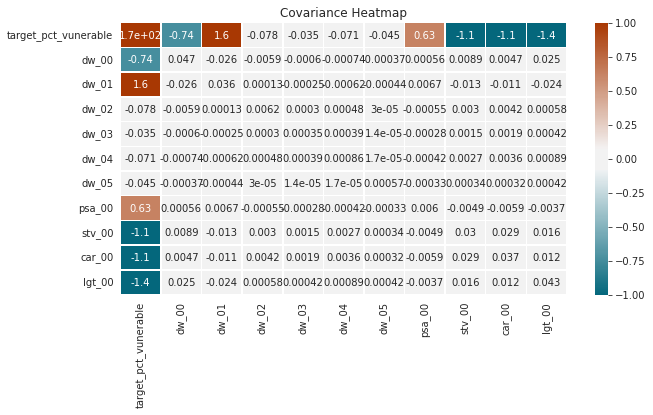

In [ ]:
# Multivariate numerical descriptive statistics

#Correlation Matrix
print("CORRELATION MATRIX\n",df.corr())
print("\n\n")

#Correlation Matrix as a Heatmap
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
cmap = sns.diverging_palette(120, 10, l = 40, s = 99, sep = 20, center = 'light', as_cmap = True)
sns.heatmap((df).corr(), vmin = -1, vmax = 1, annot = True, cmap = cmap, lw = .5, linecolor = 'white')
plt.title("Correlation Heatmap")
plt.show()

# Covariance Matrix
print("\n\nCOVARIANCE MATRIX\n",df.cov())
print("\n\n")

#Covariance Matrix as a Heatmap
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
cmap = sns.diverging_palette(220, 20, l = 40, s = 99, sep = 20, center = 'light', as_cmap = True)
sns.heatmap((df).cov(), vmin = -1, vmax = 1, annot = True, cmap = cmap, lw = .5, linecolor = 'white')
plt.title("Covariance Heatmap")
plt.show()

# dw_01, psa_00, stv_00, car_00 and lgt_00 are highly correleated with the target
# There are high correlation between dw_03 and dw_04 and stv_00 and car_00

# Graphical Descriptive Statistics

## Histograms, Violin, Pairplot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f58d3447650>,
      dtype=object)

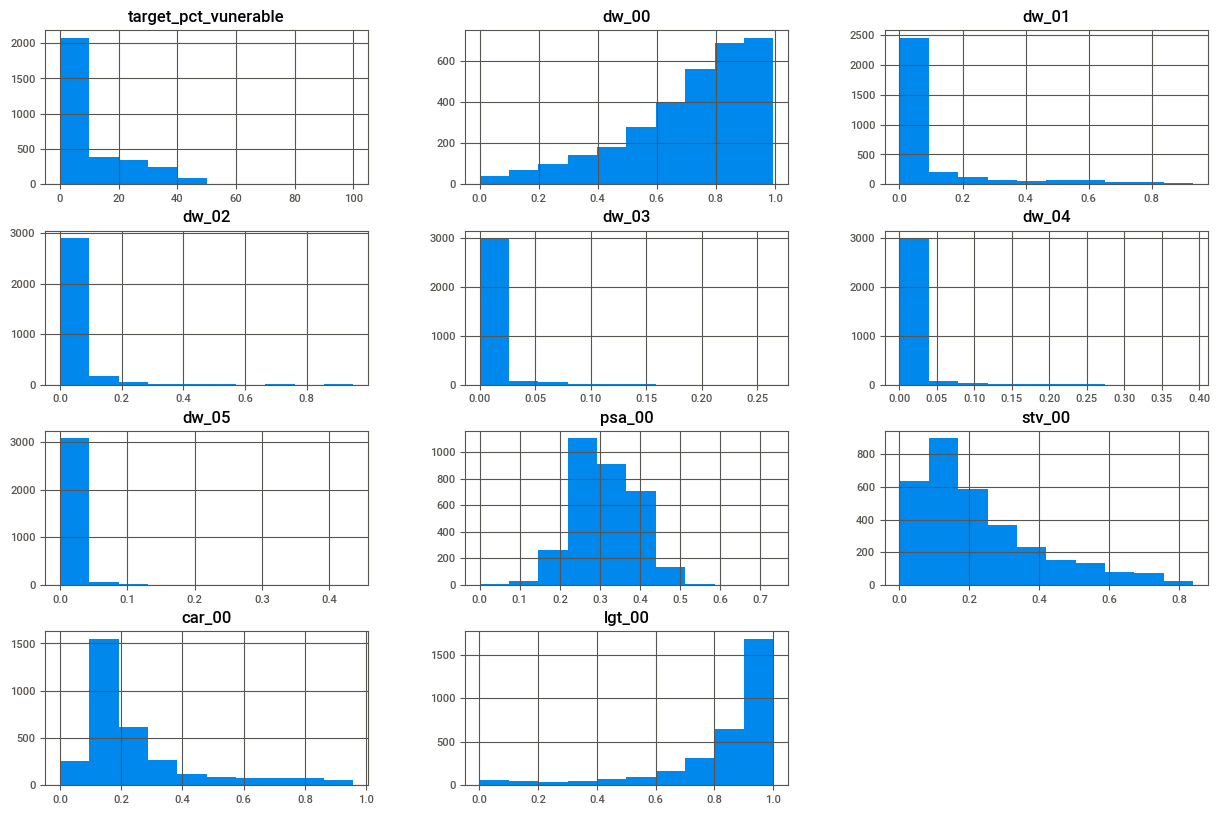

In [ ]:
# Histograms
df.hist(figsize=(15,10))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


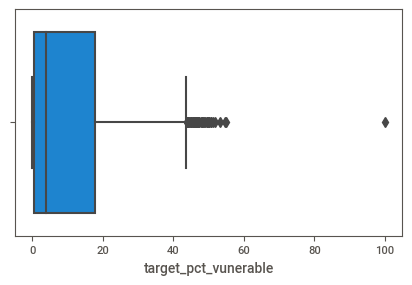

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


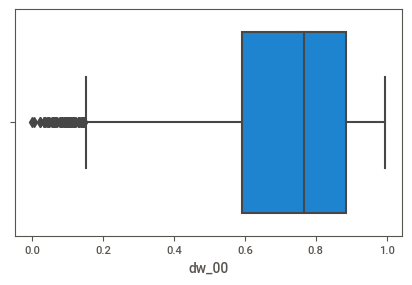

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


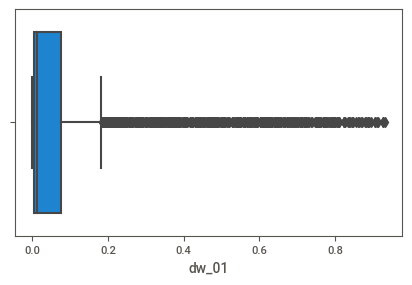

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


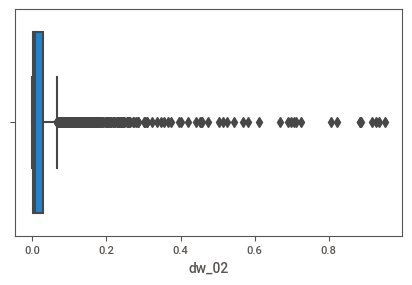

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


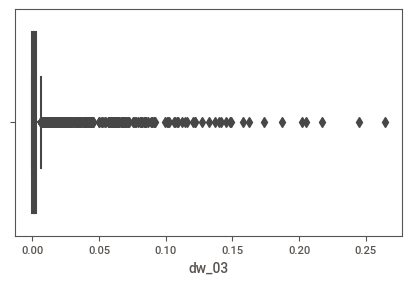

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


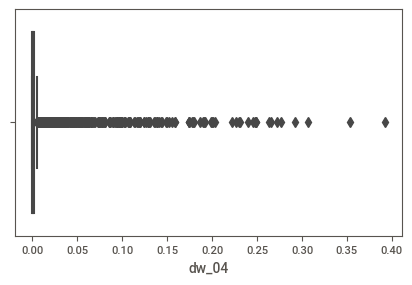

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


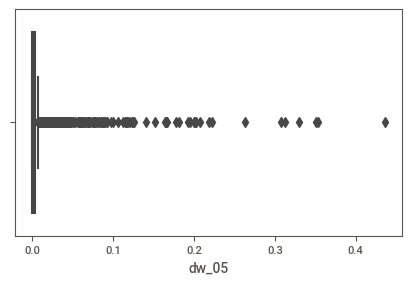

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


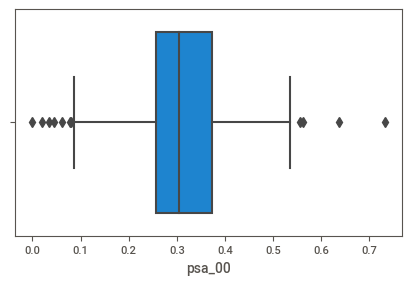

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


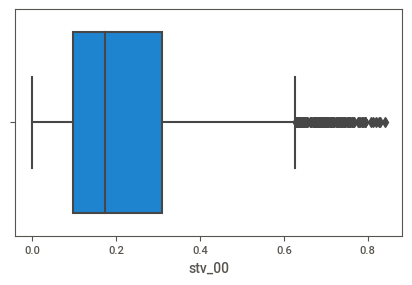

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


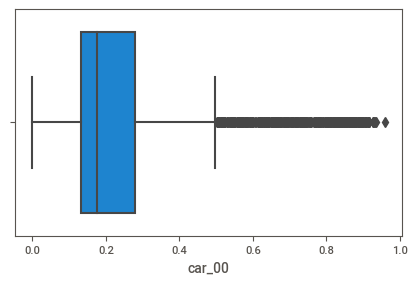

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


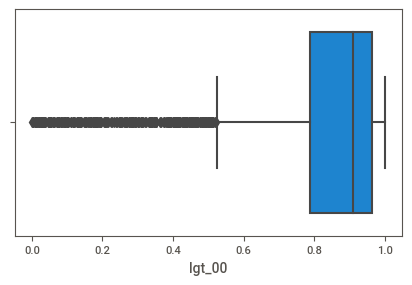

In [ ]:
# BOX
for i in df.columns:
  if df.dtypes[i] == 'float64':
    plt.figure(figsize = (5,3))
    sns.boxplot(df[i])
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


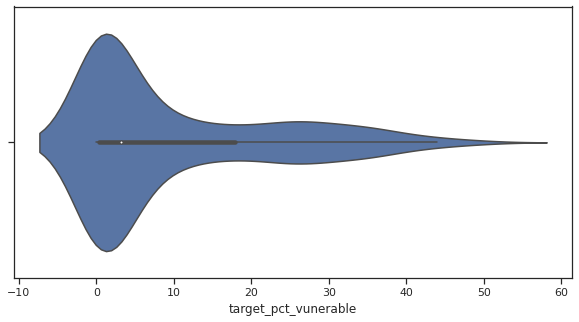

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


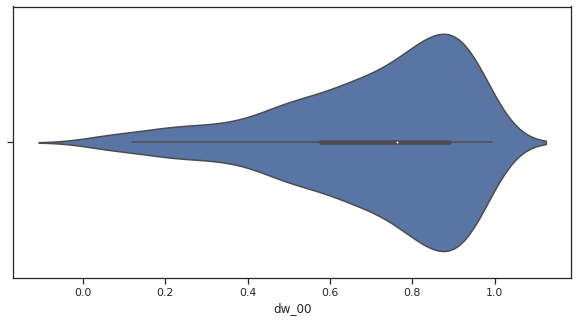

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


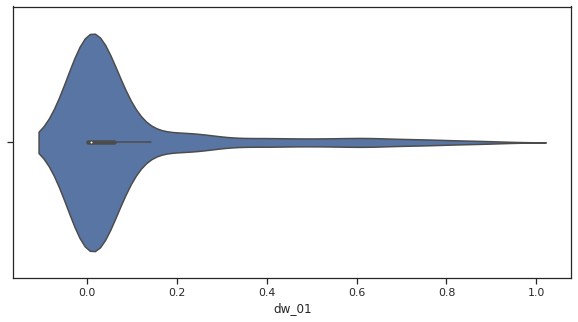

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


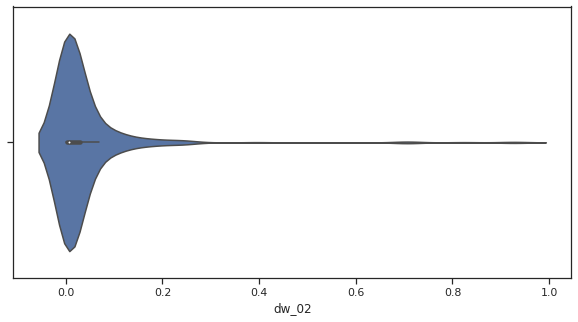

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


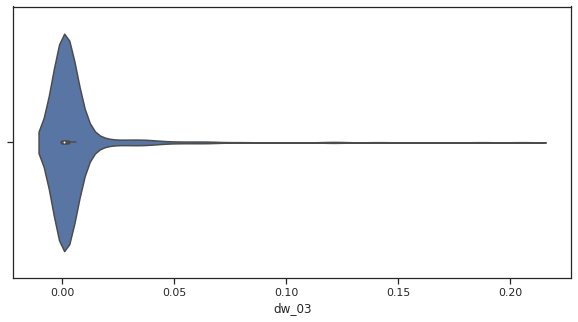

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


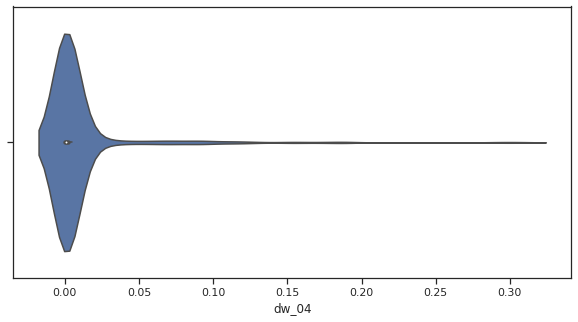

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


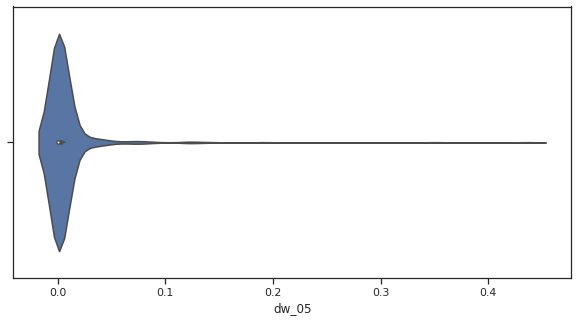

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


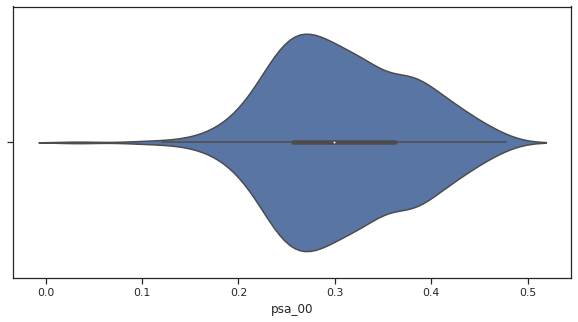

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


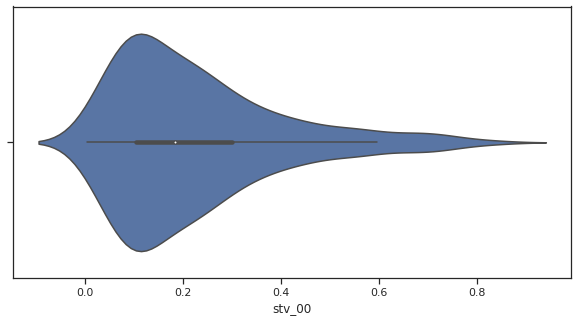

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


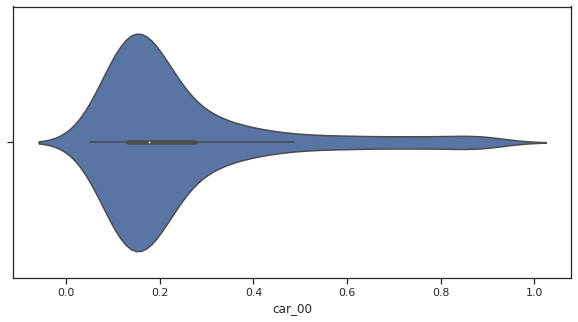

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


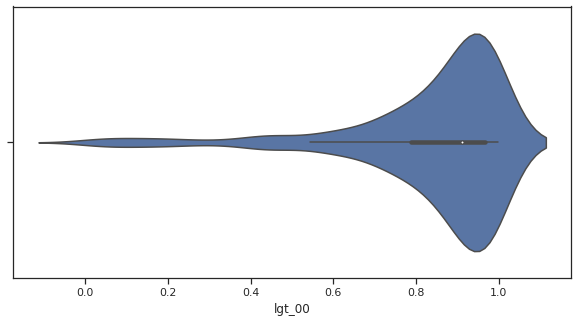

In [ ]:
# Violin
for i in df.columns:
  if df.dtypes[i] == 'float64':
    plt.figure(figsize = (10,5))
    sns.violinplot(df[i])
    plt.show()

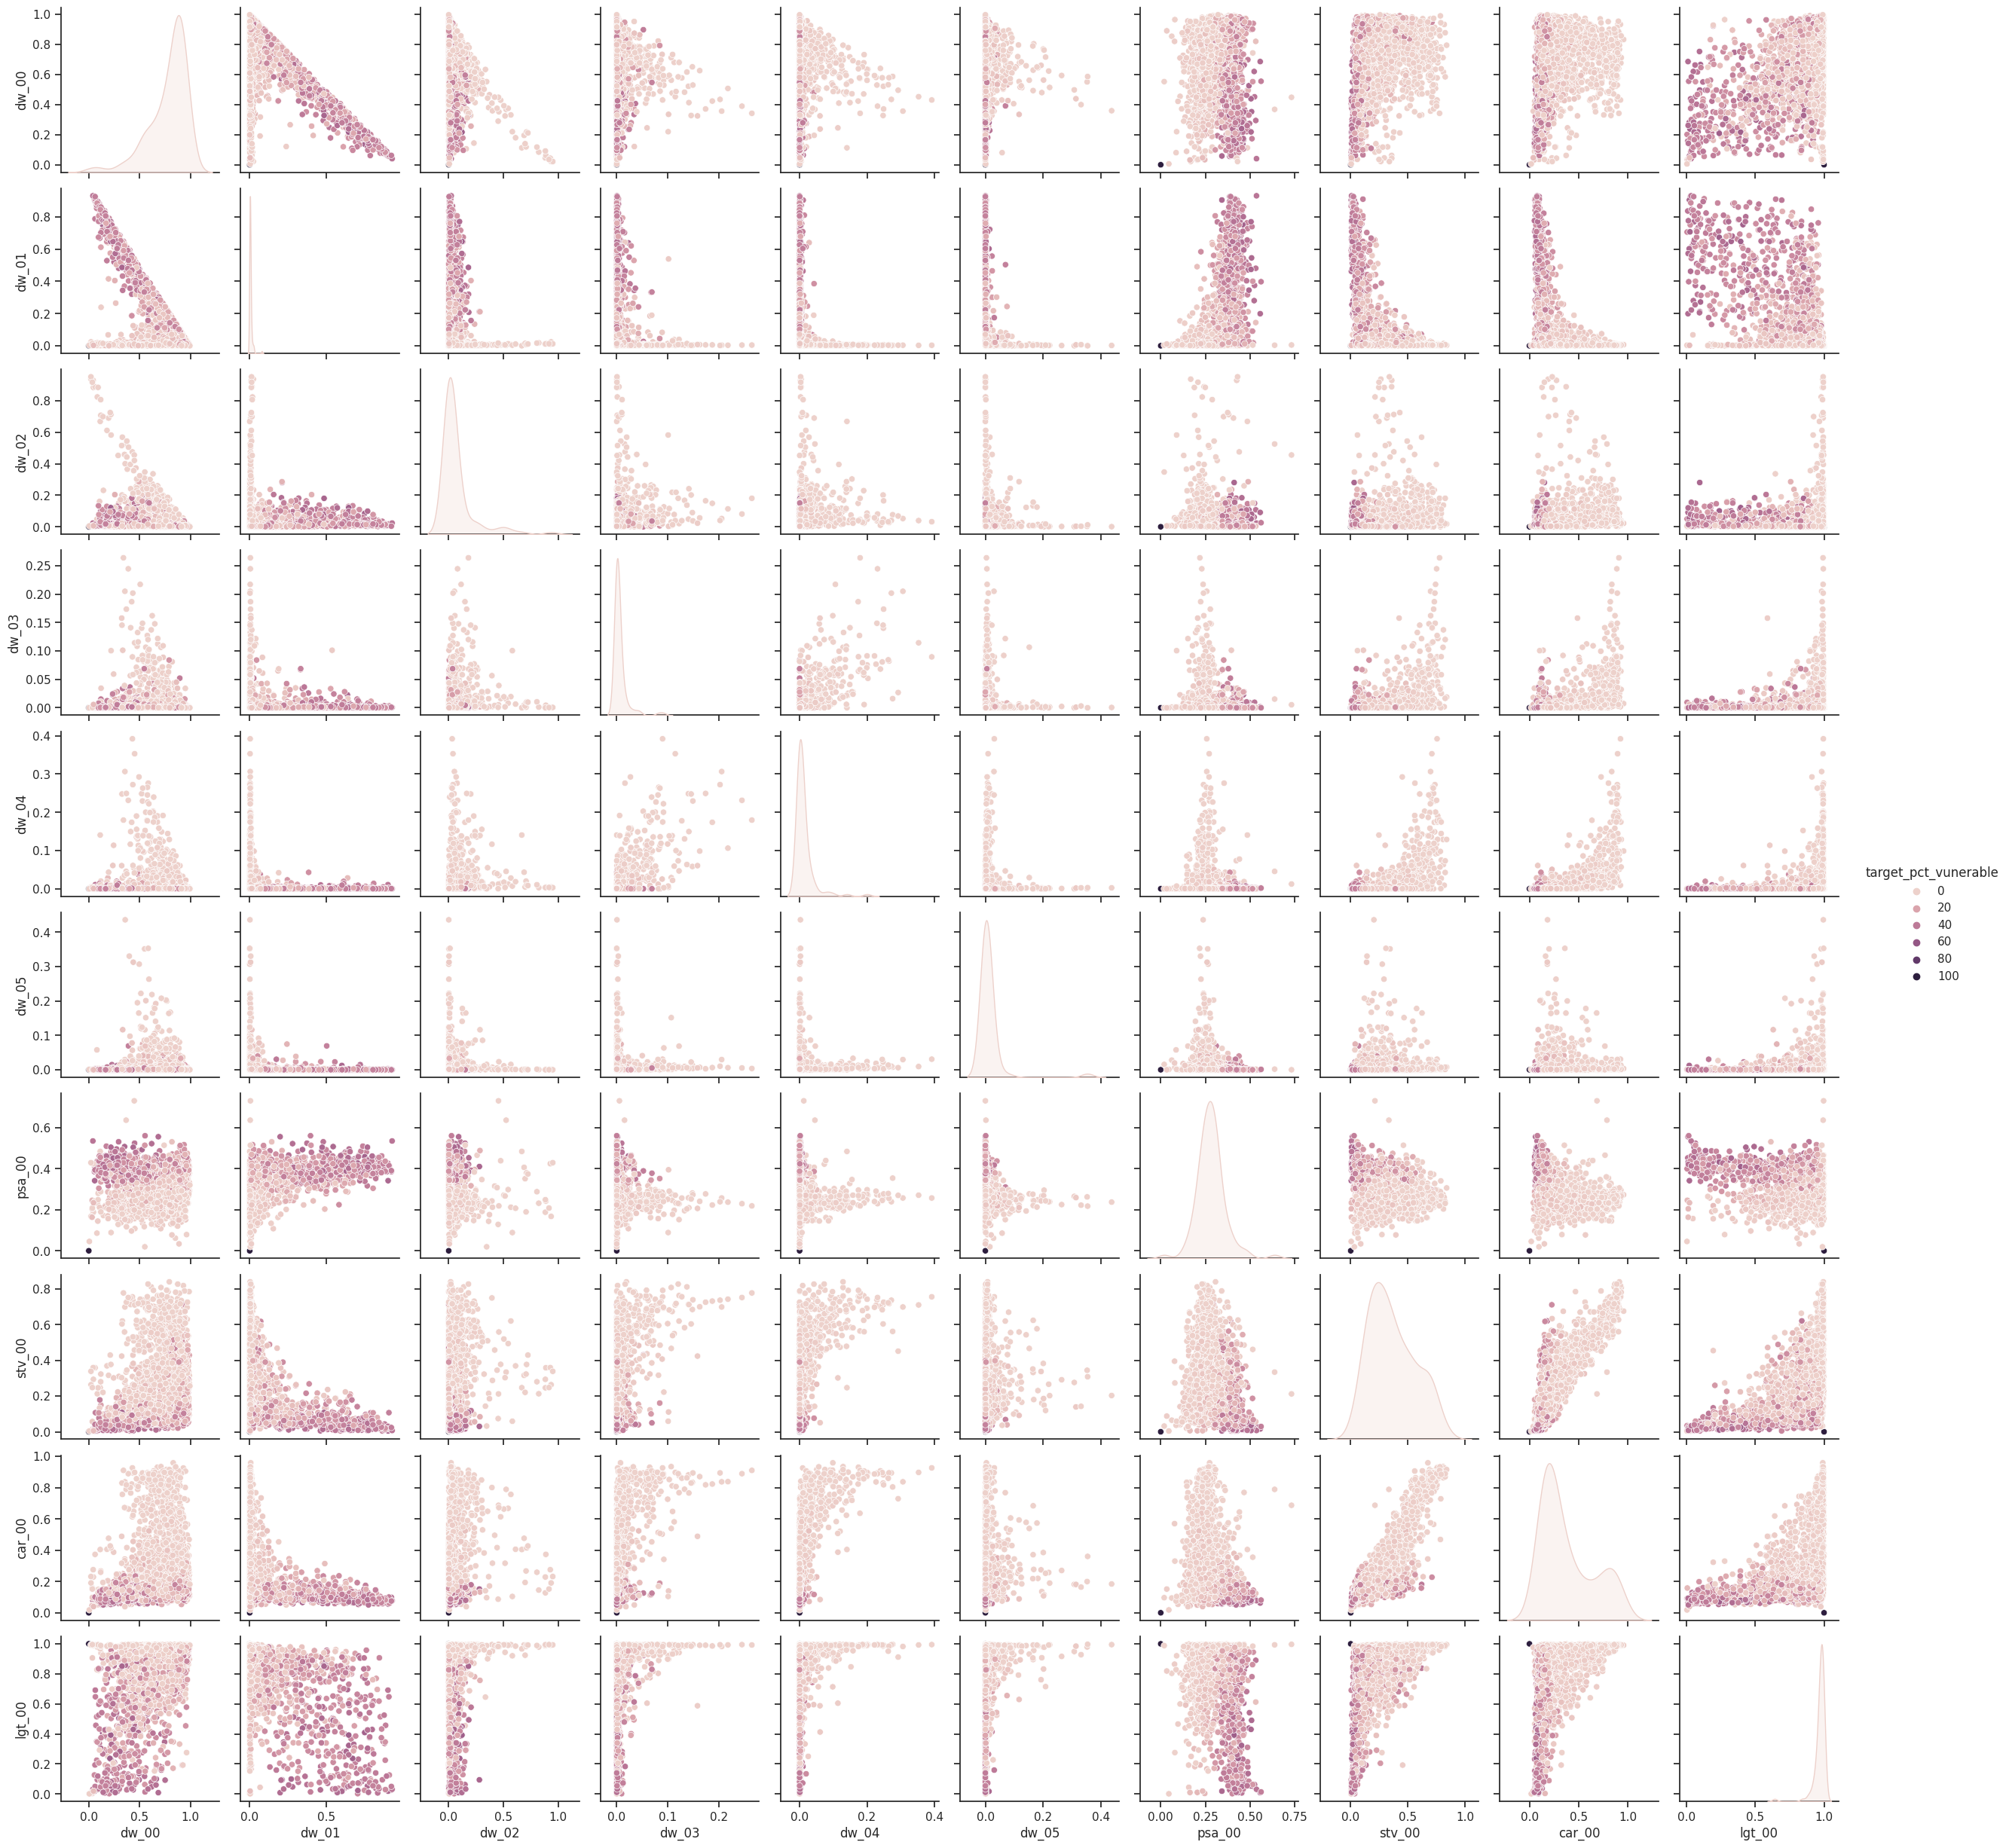

In [ ]:
# pairplot
sns.set_theme(style="ticks")
sns.pairplot(df, hue="target_pct_vunerable")

## Interactive Visualizations

In [ ]:
# Plotly
fig = px.scatter_3d(df, z='dw_00', y='target_pct_vunerable', x='dw_01', hover_name='target_pct_vunerable')
fig

In [ ]:
fig = px.scatter_3d(df, z='dw_02', y='target_pct_vunerable', x='dw_03', hover_name='target_pct_vunerable')
fig

In [ ]:
fig = px.scatter_3d(df, z='dw_04', y='target_pct_vunerable', x='dw_05', hover_name='target_pct_vunerable')
fig

## Automated Visualizations

                                             |          | [  0%]   00:00 -> (? left)


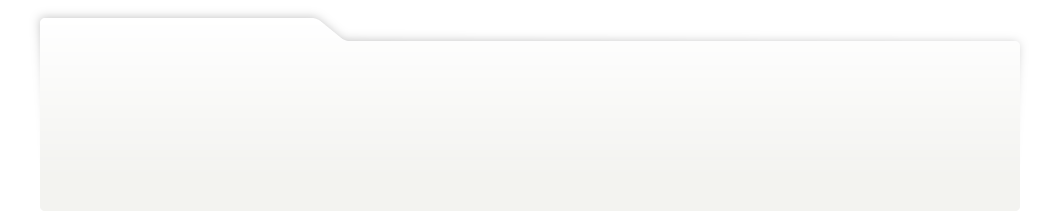
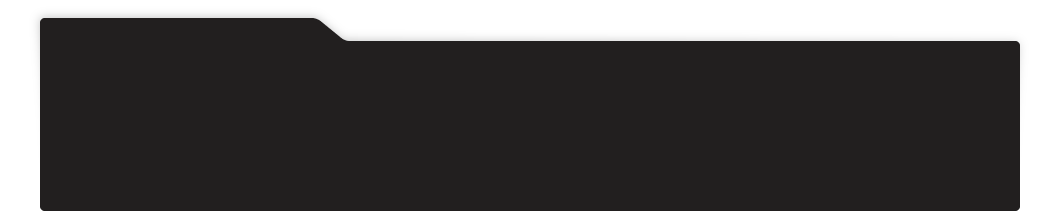
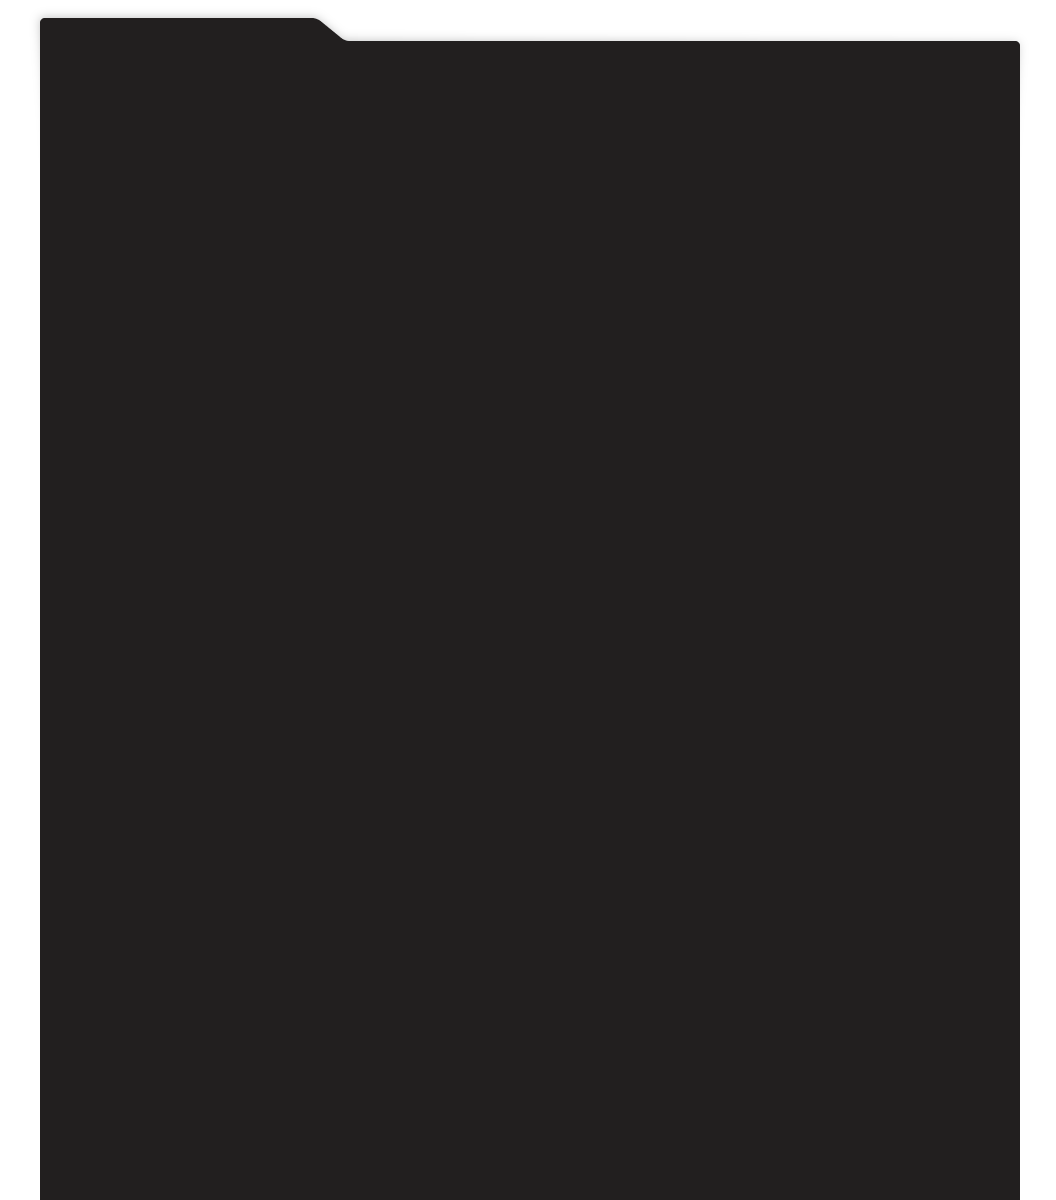
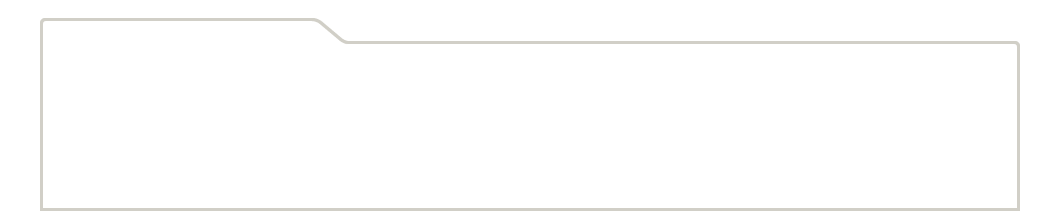
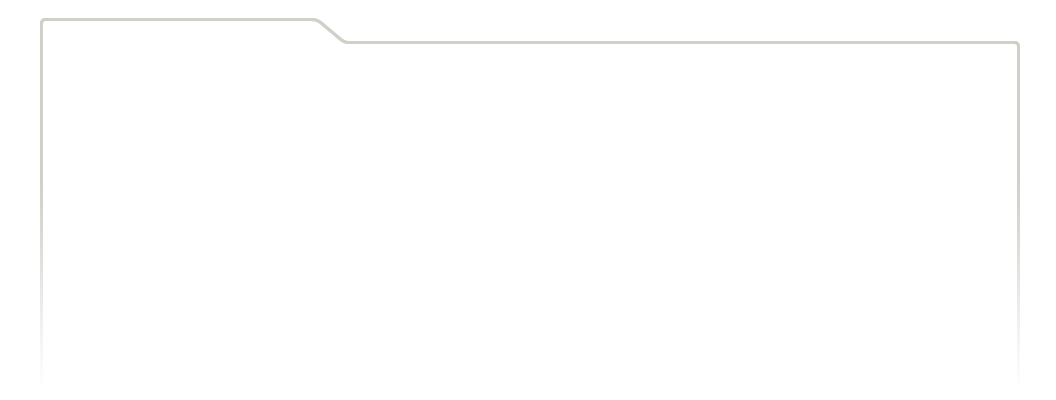
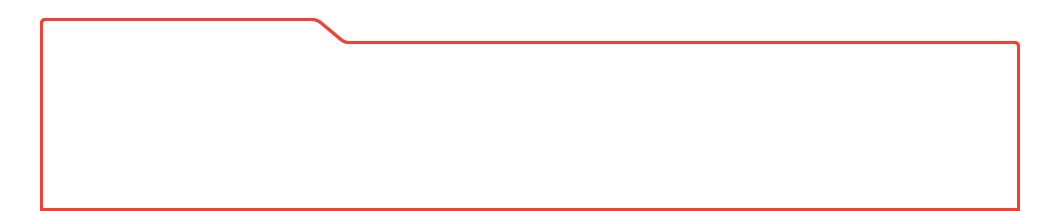
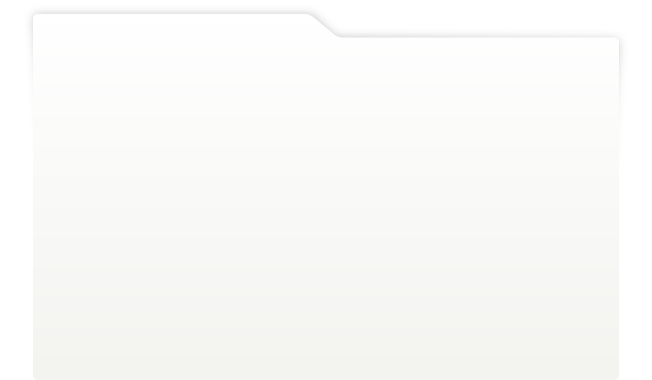
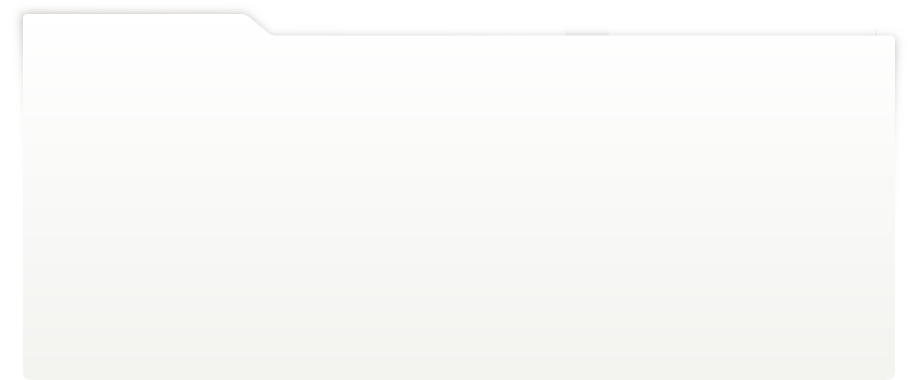
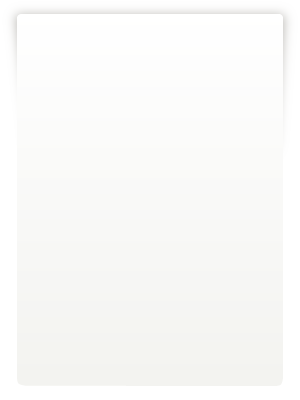
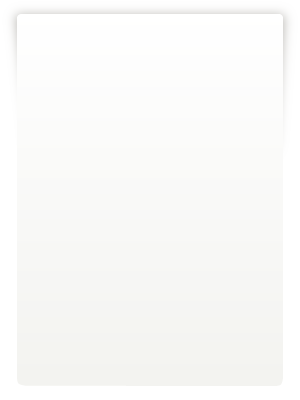
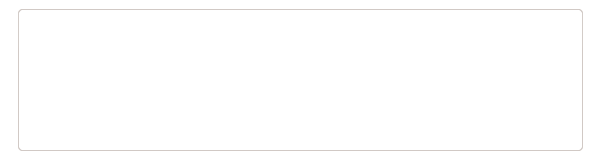
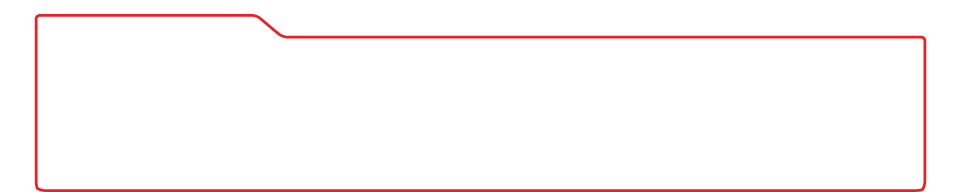
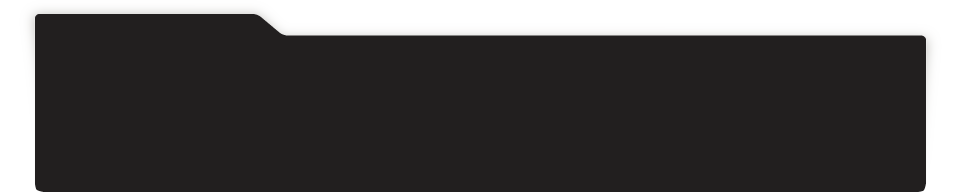
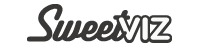
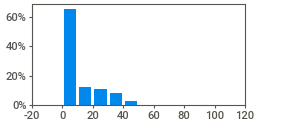
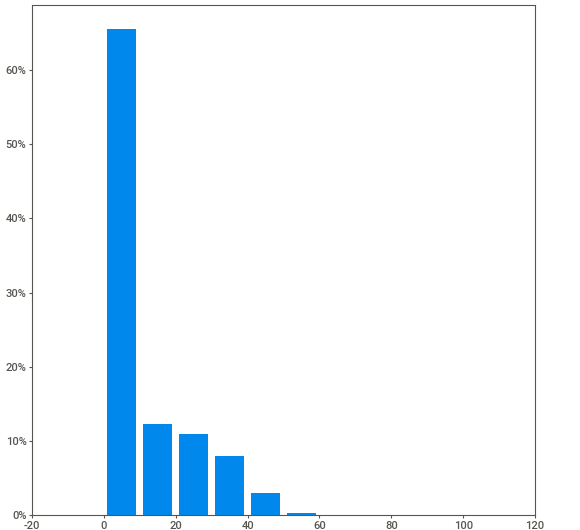
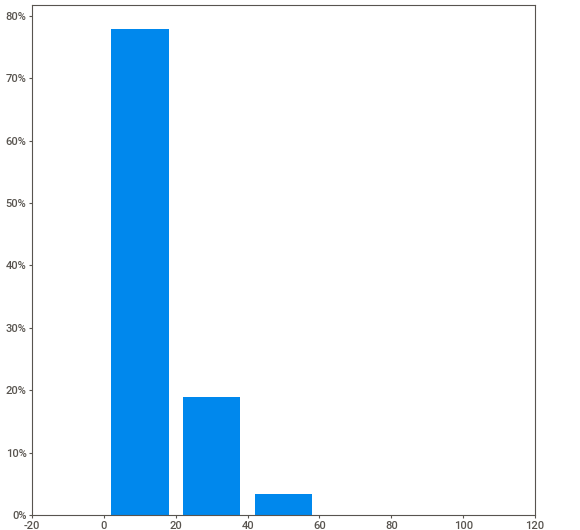
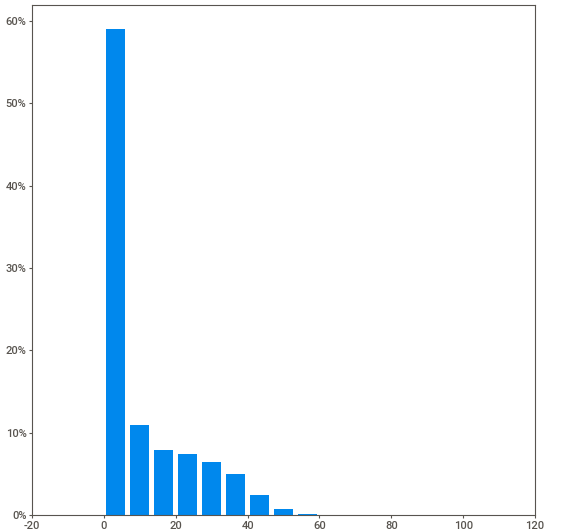
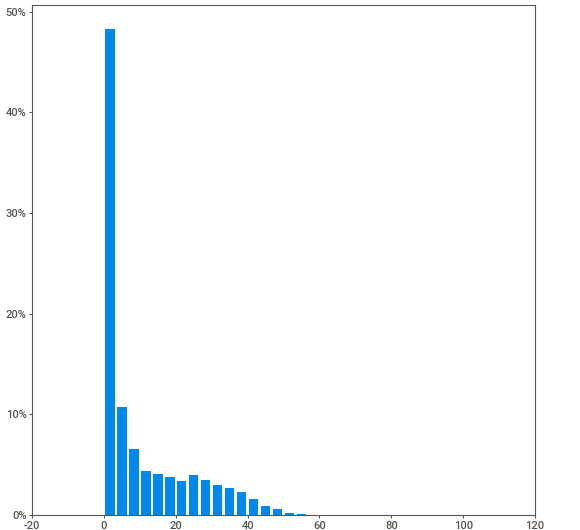
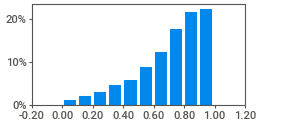
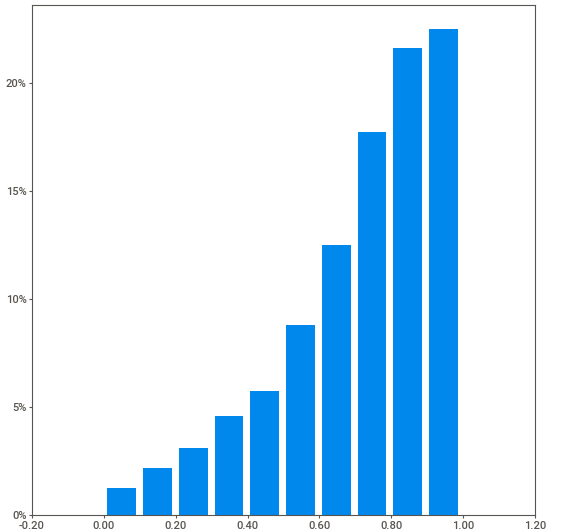
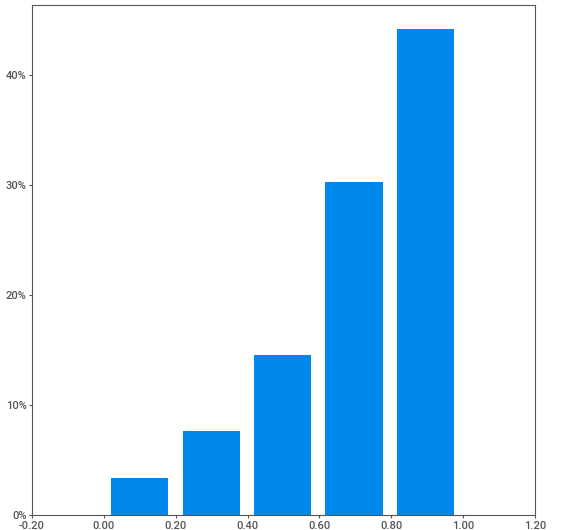
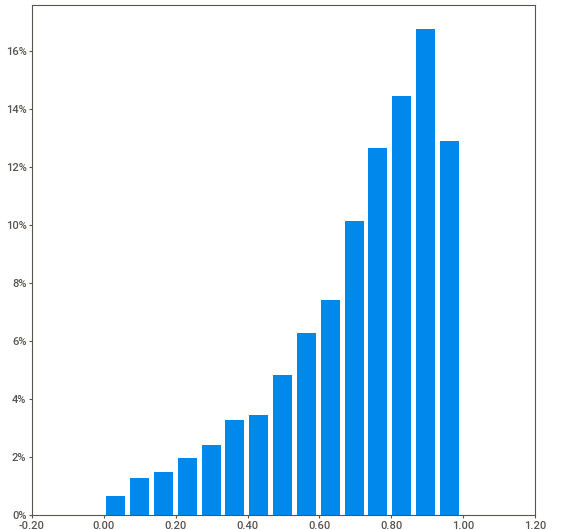
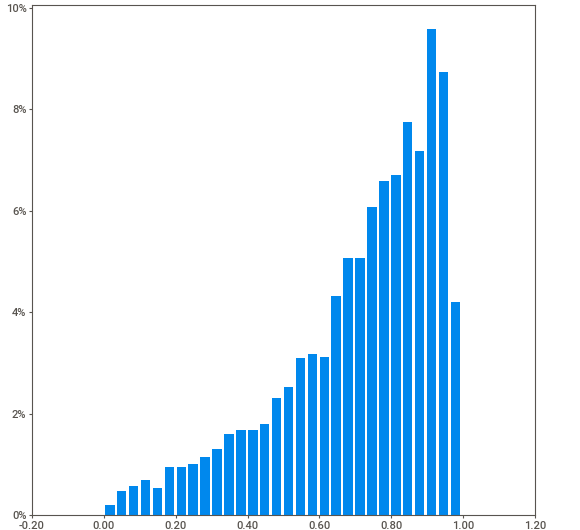
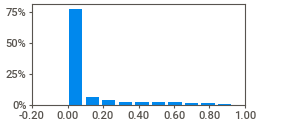
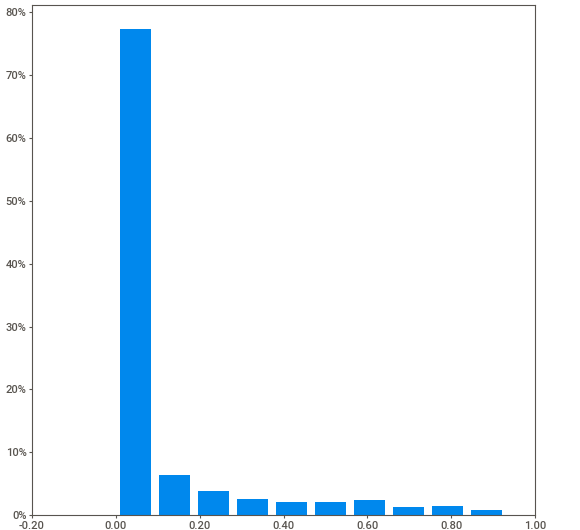
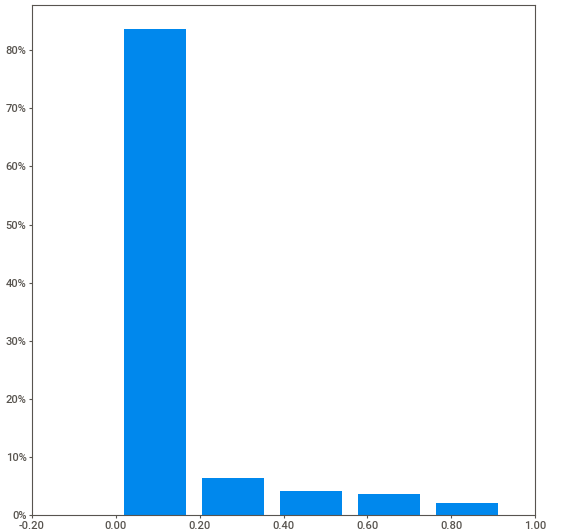
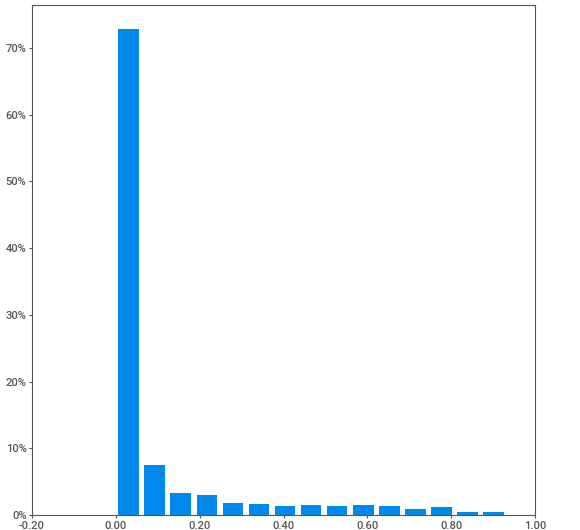
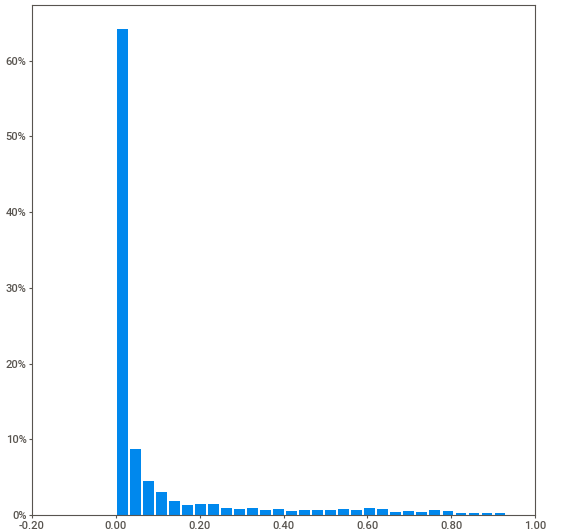
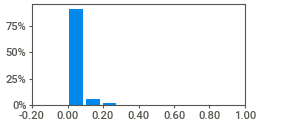
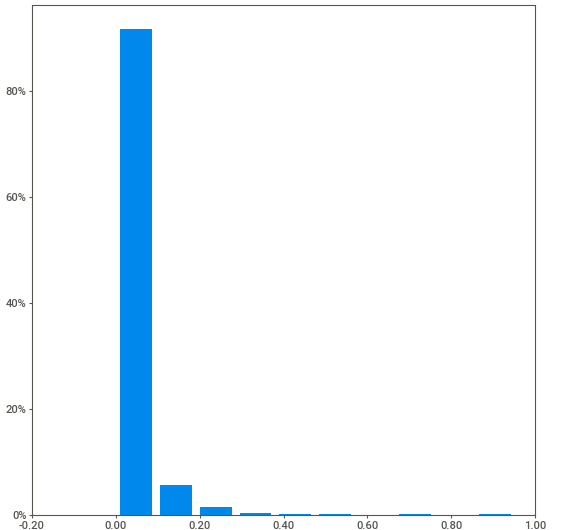
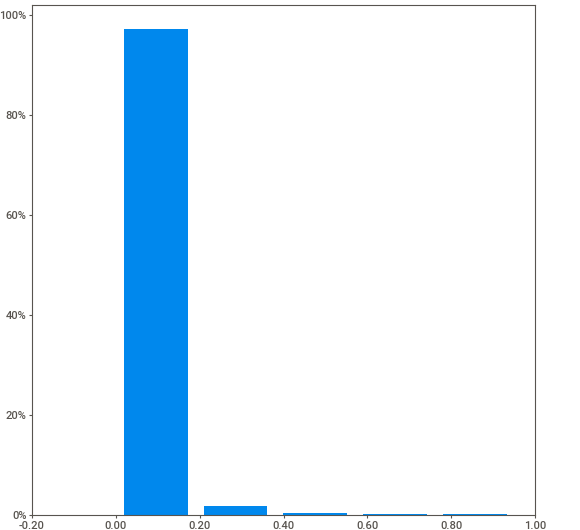
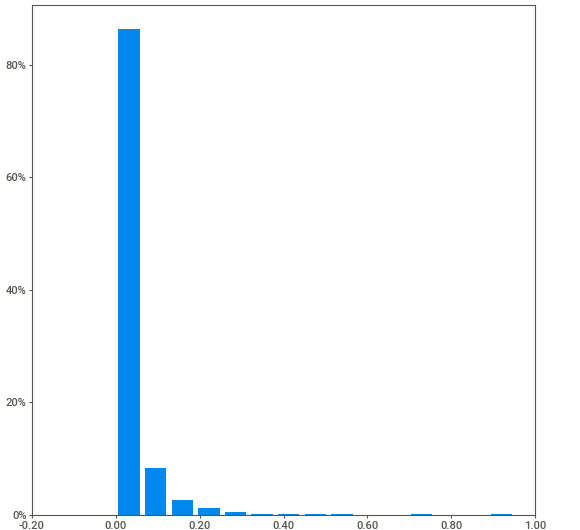
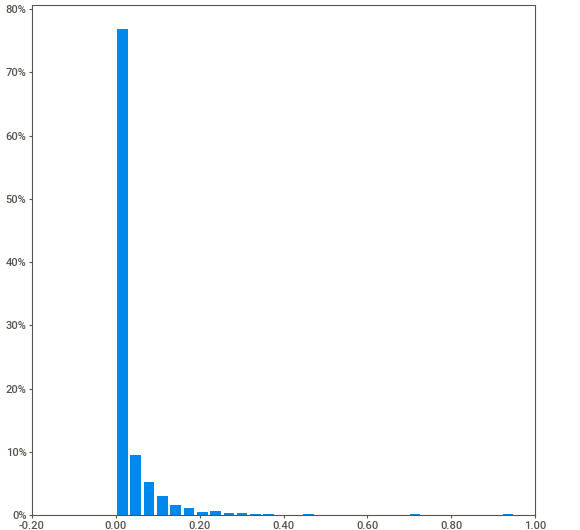
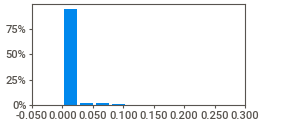
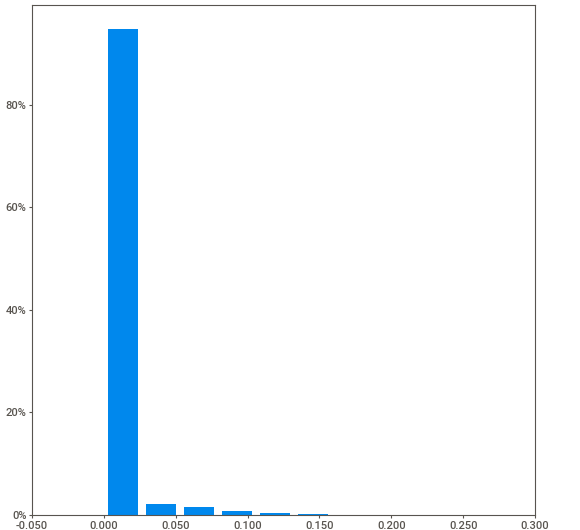
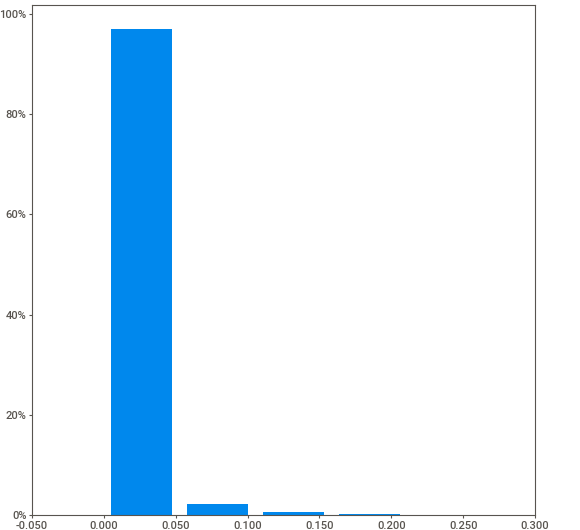
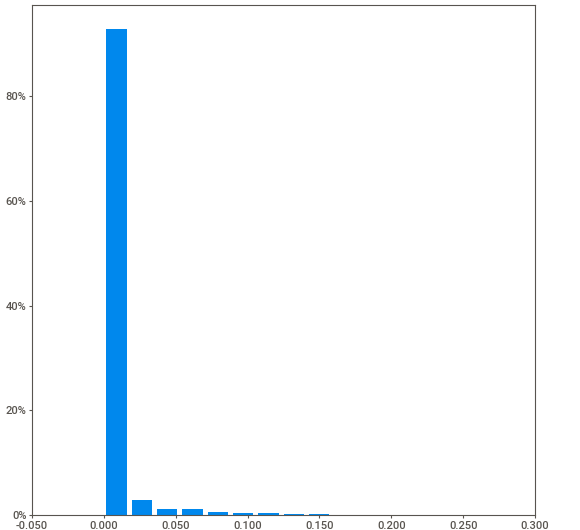
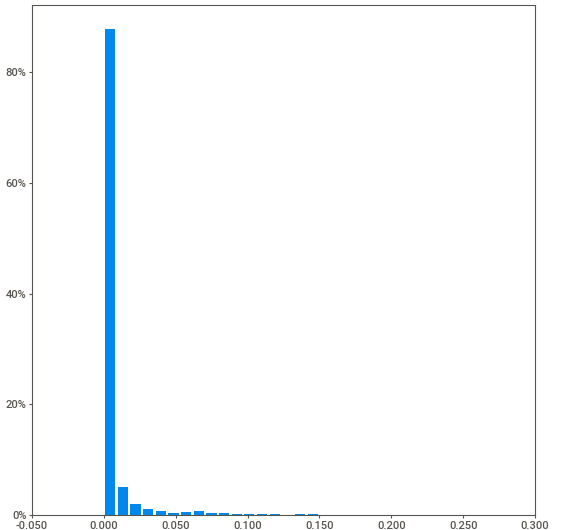
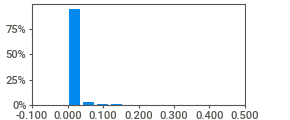
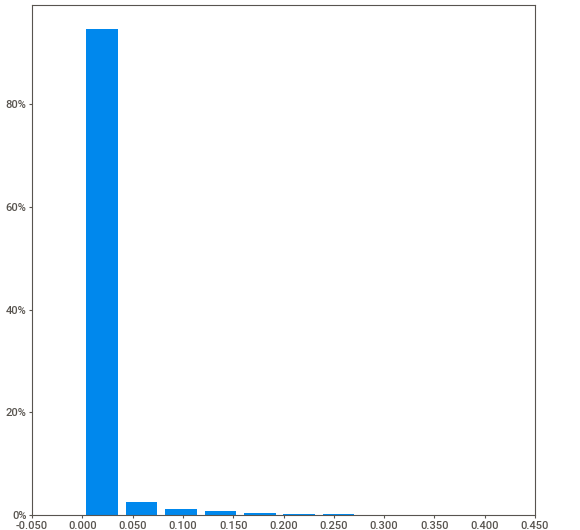
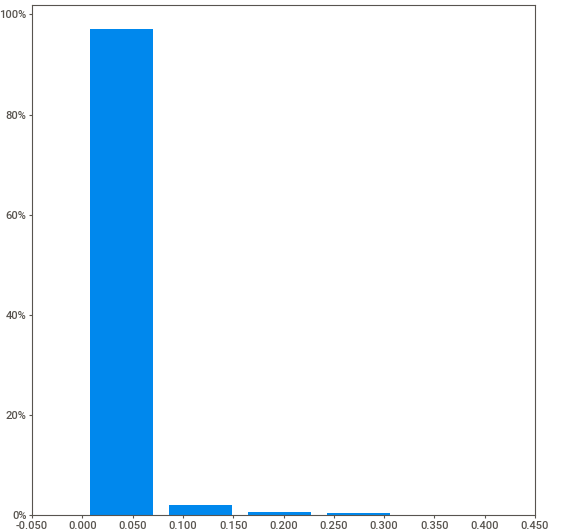
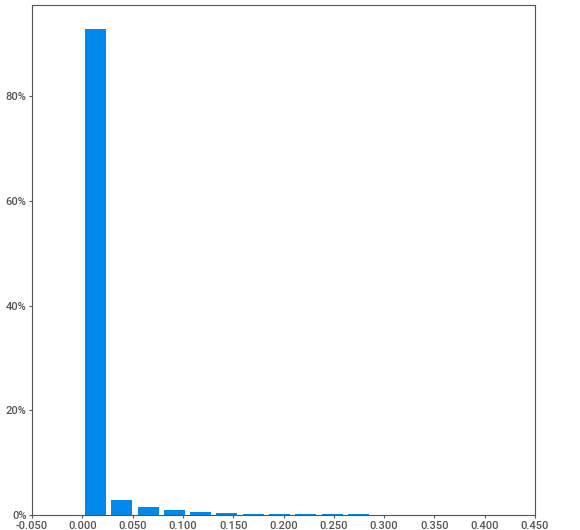
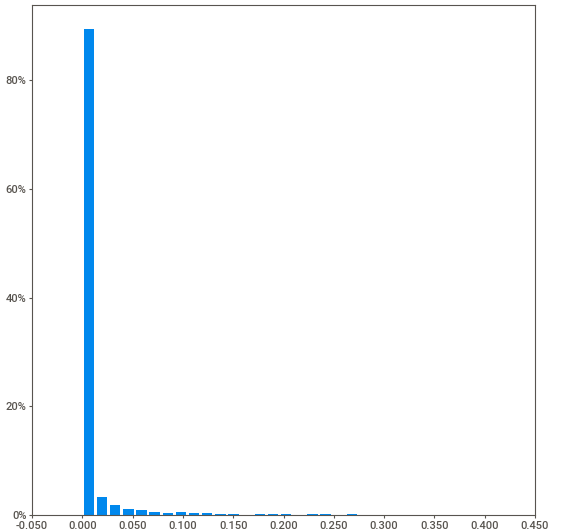
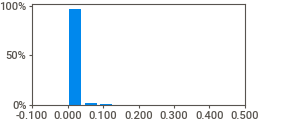
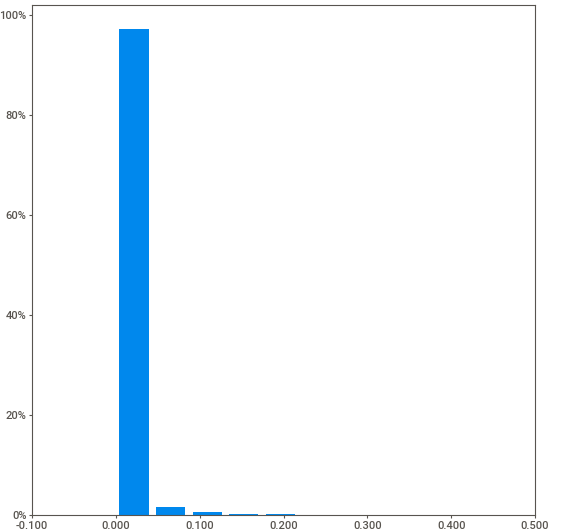
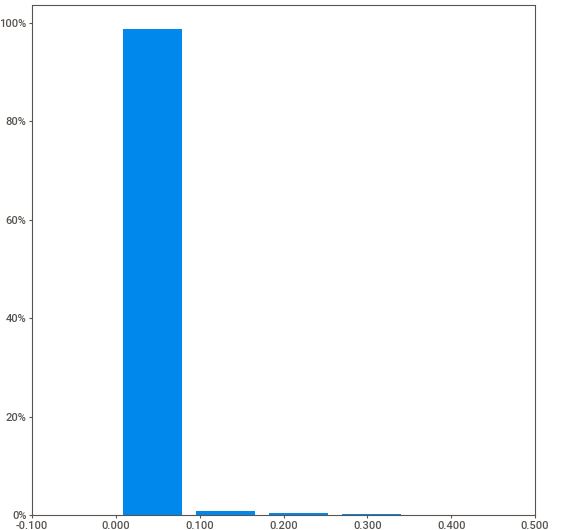
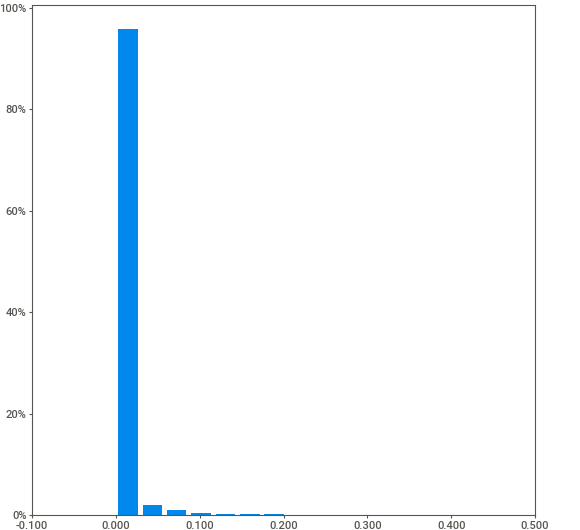
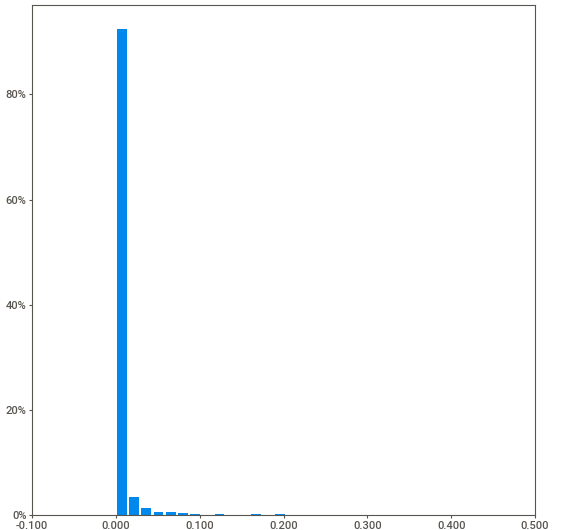
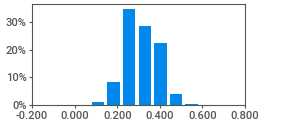
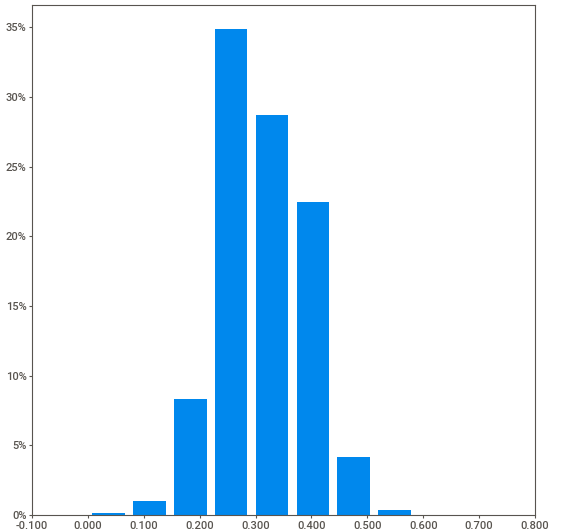
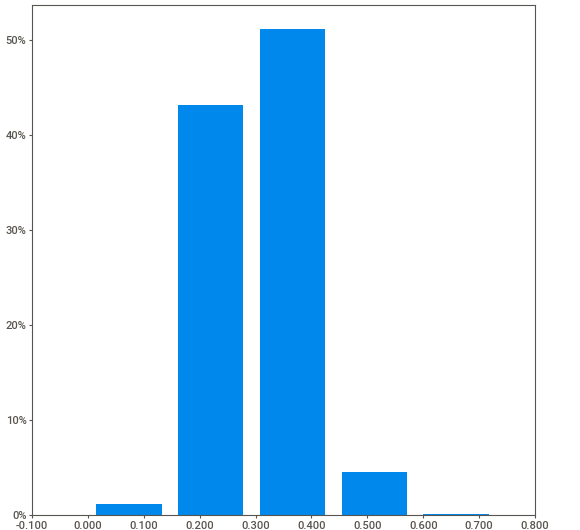
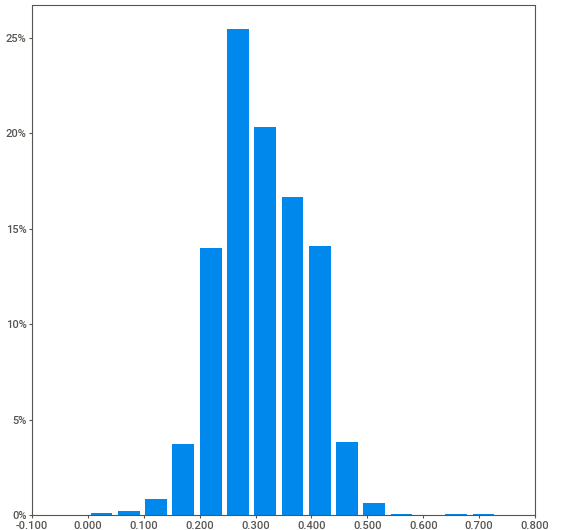
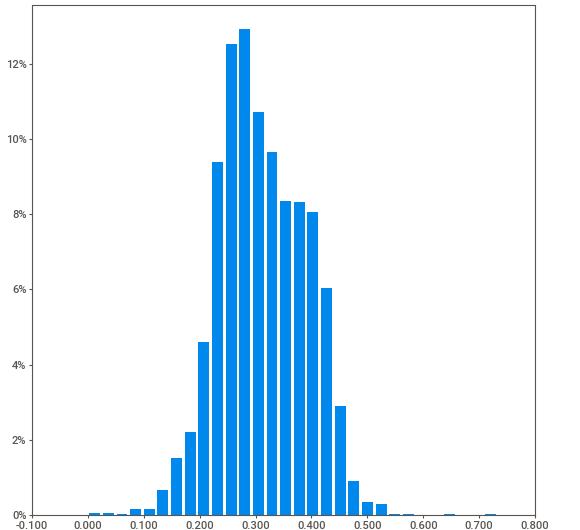
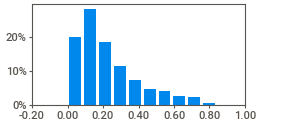
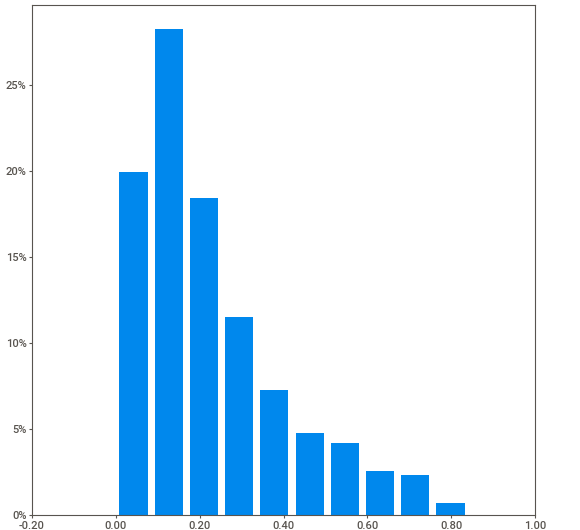
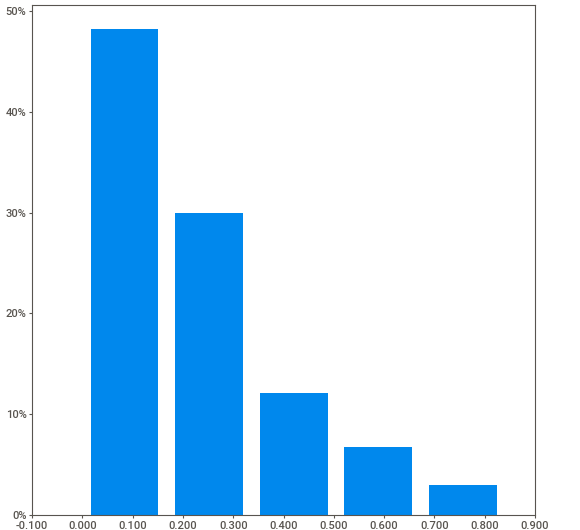
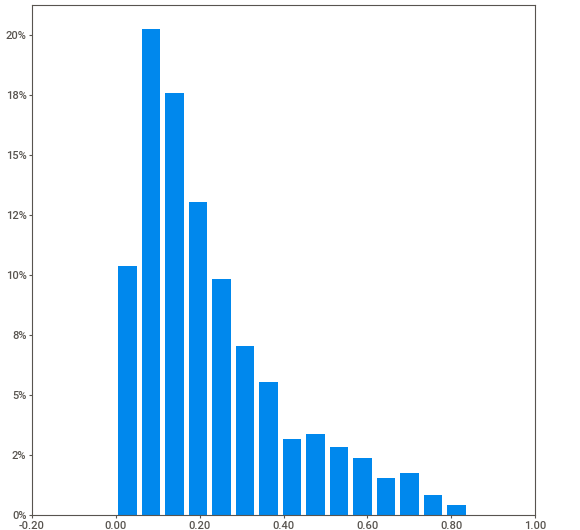
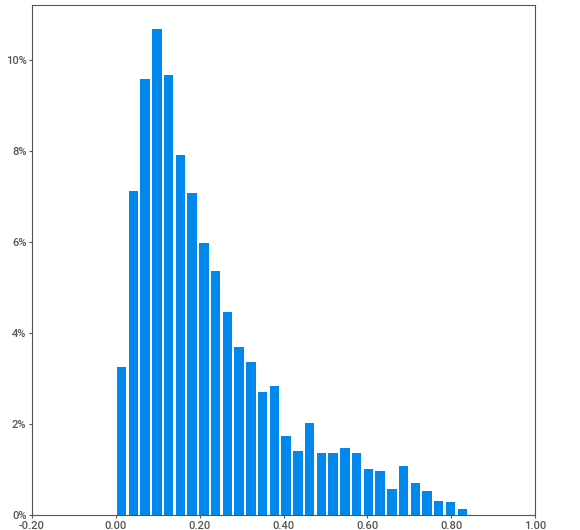
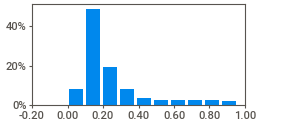
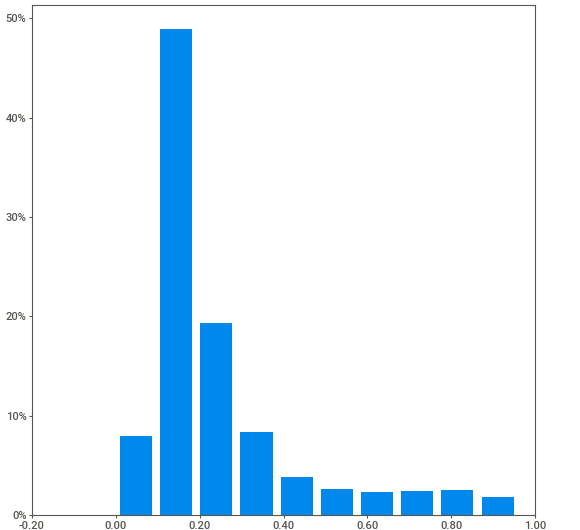
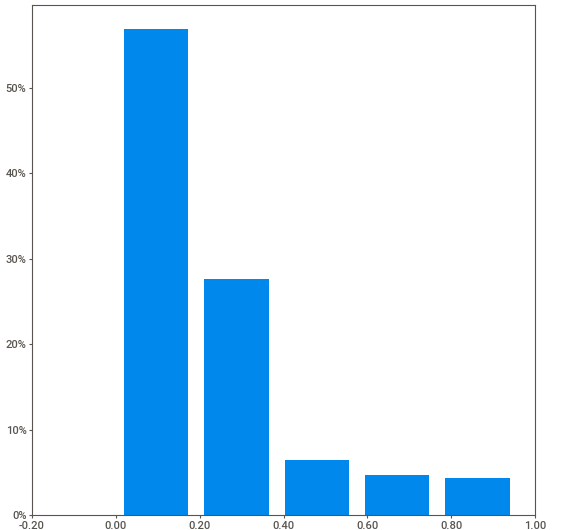
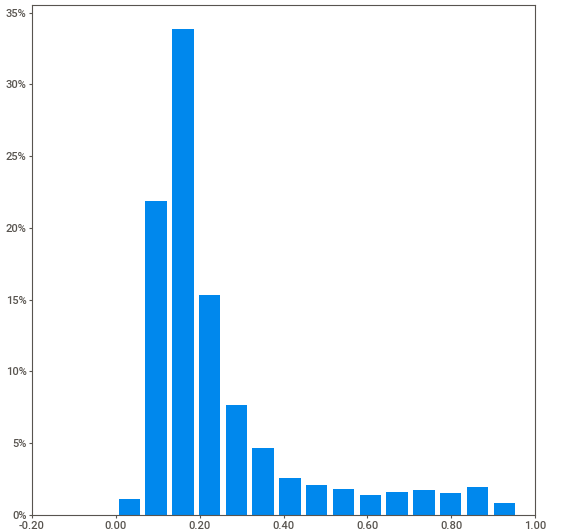
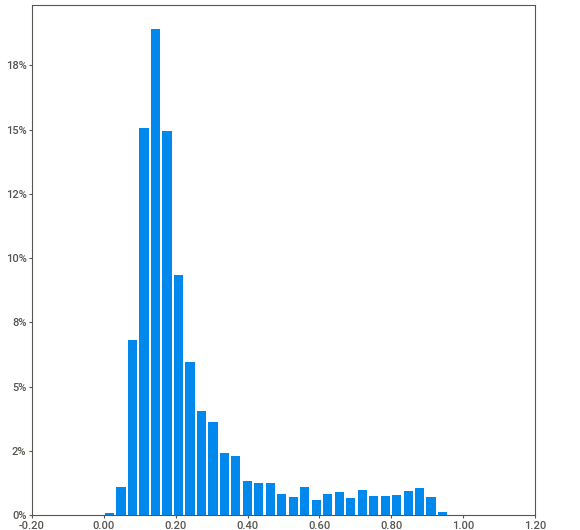
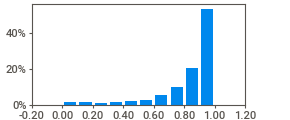
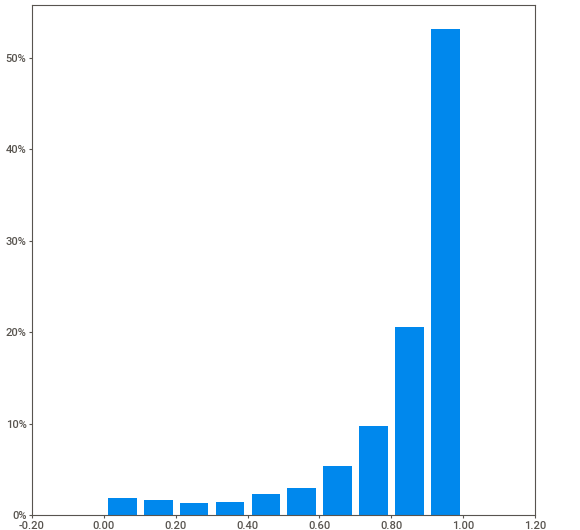
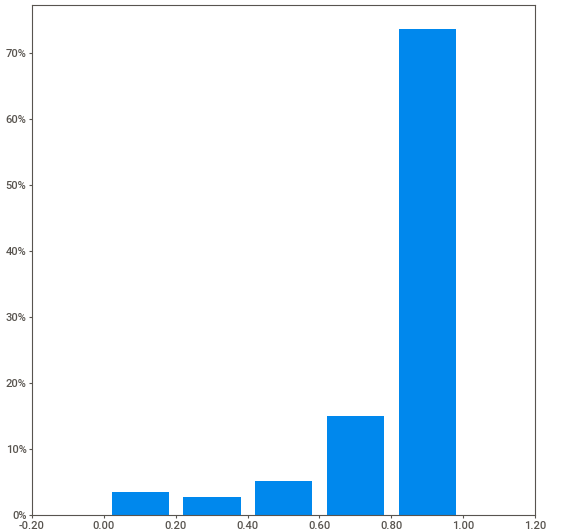
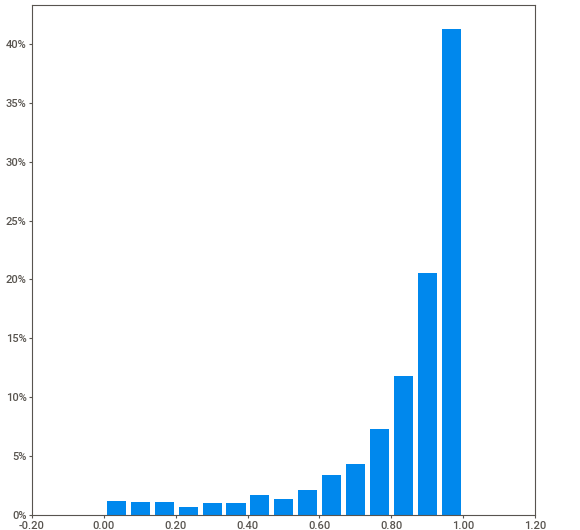
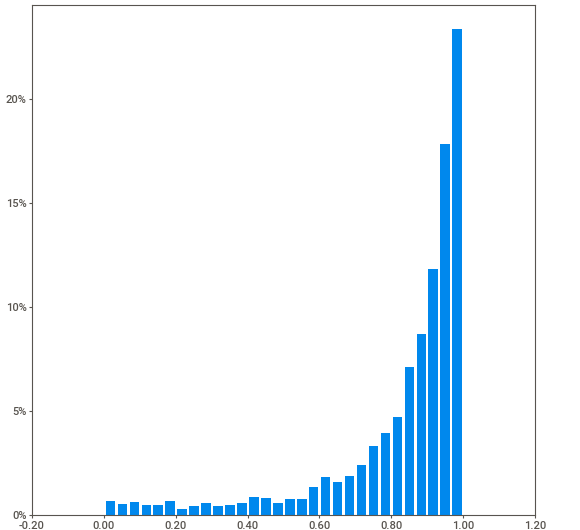
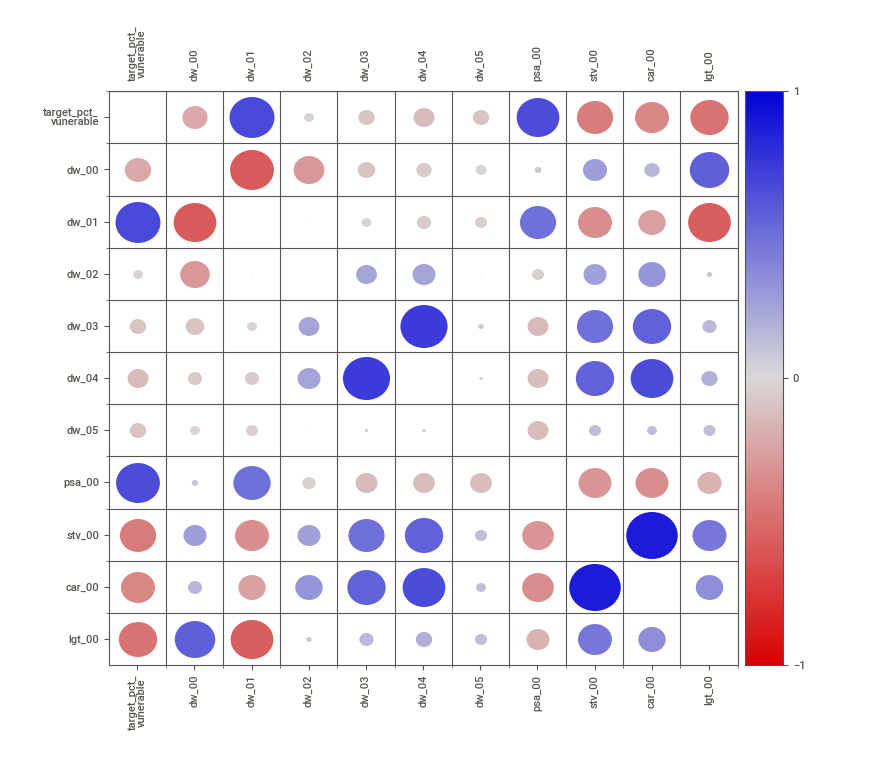
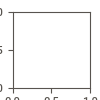

In [ ]:
# Sweetviz as an example of automated visualization

vizreport = sv.analyze(df)
vizreport.show_notebook(layout='widescreen', w=1500, h=300, scale=0.7) #widescreen layout
#vizreport.show_notebook(layout='vertical', w=800, h=300, scale=0.7)   #vertical layout

# Conclusions

The shape of the data we use is (3174,11). All the variables are numeric with datatype of float. There are no missing values or duplicates in the data.



A long list of detailed observations from the descriptive statistics can be compiled that could include:

* many variables has heavy skewness， a correction should be produced before developing ML model.
* **dw_02** to **dw_05** has very high kurtosis, meaning the tails are heavy and there will be many extreme values.
* the **target_pct_vunerable** and other variables are not using the same unit. (100% for **target_pct_vunerable**, 1 for others)
* **dw_01, psa_00, stv_00, car_00** and **lgt_00** are highly correleated with the target, which may be helpful in the ML model.
* There are high correlation between **dw_03** and **dw_04** and **stv_00 and car_00**.
* Based on the data type, we don't need to do the conter plot for this data.
* This data is not catagorical data which means parallel coordinates plot is not needed
* There are outliers based on the box plots.(out between Q1 & Q4)